# Beta Variation Study

This notebook explores how plasma flux surfaces change with different beta values using a rotating ellipse boundary.

In [1]:
from constellaration import initial_guess
from constellaration.mhd import ideal_mhd_parameters_utils, vmec_settings, vmec_utils
from constellaration.utils import visualization, visualization_utils

## Create rotating ellipse boundary

In [3]:
beta_study_boundary = initial_guess.generate_rotating_ellipse(
    aspect_ratio=6.0,
    elongation=1.5,
    rotational_transform=0.4,
    n_field_periods=4,
)

## Generate equilibria at different beta values

In [4]:
beta_values = [0.0, 0.02, 0.04]

equilibria = []
for beta in beta_values:
    mhd_params = (
        ideal_mhd_parameters_utils.get_ideal_mhd_parameters_for_volume_averaged_beta(
            beta_study_boundary, beta
        )
    )
    settings = vmec_settings.vmec_settings_low_fidelity_fixed_boundary(
        beta_study_boundary
    )
    equilibrium = vmec_utils.run_vmec(
        boundary=beta_study_boundary, mhd_parameters=mhd_params, vmec_settings=settings
    )
    equilibria.append(equilibrium)

## Plot flux surfaces side by side

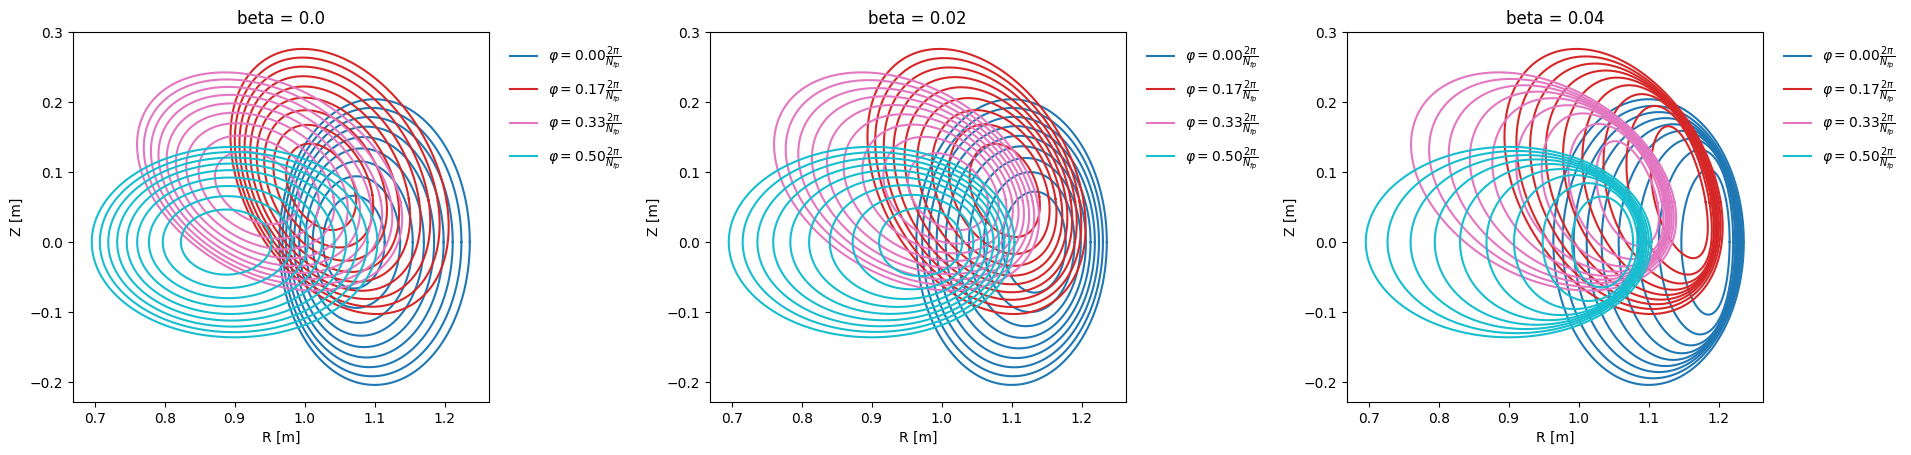

In [6]:
%matplotlib agg
flux_surface_plots = [
    visualization.plot_flux_surfaces(eq, beta_study_boundary, title=f"beta = {beta}") 
    for beta, eq in zip(beta_values, equilibria)
]

visualization_utils.combine_figures_side_by_side(*flux_surface_plots)